# Solve NLP using SQP 

In [100]:
%load_ext autoreload
%autoreload 2
%run basic_material

from scipy.optimize import minimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Python: 3.8.12


In [101]:
fun = lambda x: x[0]**2 + x[1]**2 + np.log(x[0]*x[1])

cons = ({'type': 'ineq', 'fun': lambda x:  x[0] * x[1] - 1 })

x0 = (5, 4)
all_x_i=[]
all_y_i=[]
all_f_i=[]
def store(x):
        all_x_i.append(x[0])
        all_y_i.append(x[1])
        all_f_i.append(fun(x))
        
store(x0)
sol = minimize(fun, x0, method='SLSQP', callback=store, constraints=cons)
print(f"QP solution: x = {sol}")

QP solution: x =      fun: 2.000000000015172
     jac: array([   3.000,    3.000])
 message: 'Optimization terminated successfully'
    nfev: 67
     nit: 13
    njev: 12
  status: 0
 success: True
       x: array([   1.000,    1.000])


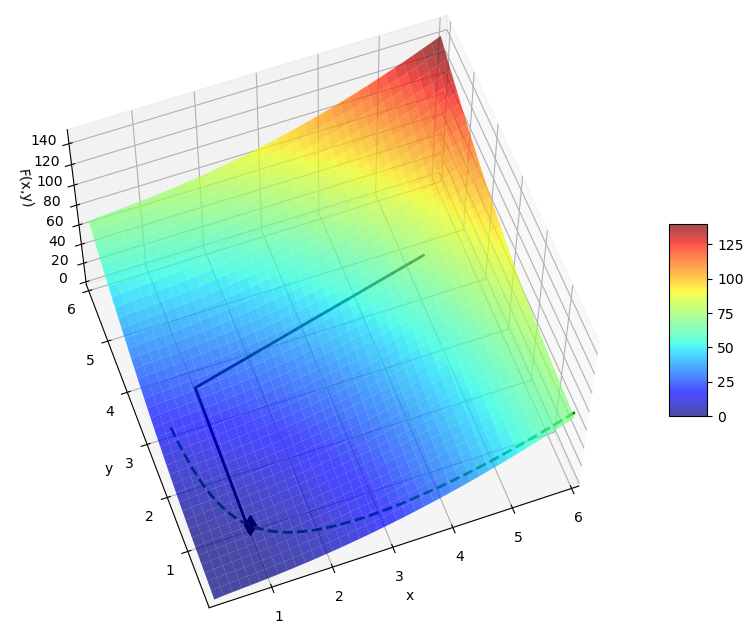

In [102]:
def F(X):
    x,y = X
    return 2*x**2 + 2*y**2 + np.log(x*y)

# Show solution paths in a surface plot
x = np.arange(.1, 6, 0.05)
y = np.arange(.1, 6, 0.05)
X, Y = np.meshgrid(x, y)
Z = F([X, Y])

# set up the figure
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.azim = -110
ax.dist = 10
ax.elev = 60
ax.set_xlim(.1, 6)
ax.set_ylim(.1, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("F(x,y)")

# plot the figure
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, alpha = 0.7, vmin=0, vmax=140)
fig.colorbar(surf, shrink=0.25, aspect=5)
plt.autoscale(False)

x1 = np.arange(.35,6,.01)
ax.plot(sol.x[0],sol.x[1],F(sol.x),'kd',ms=10)
ax.plot(x1,1/x1,F([x1,1/x1]),'g--')
ax.plot(all_x_i,all_y_i,all_f_i,'k-')
ax.set_zlim([0, 150])
plt.savefig("figs/L3_SQP_1.png")
plt.show()

In [103]:
np.vstack([all_x_i, all_y_i]).T

array([[   5.000,    4.000],
       [   0.951,    3.439],
       [   0.971,    0.981],
       [   0.996,    1.004],
       [   0.997,    1.003],
       [   0.997,    1.003],
       [   0.999,    1.001],
       [   1.000,    1.000],
       [   1.000,    1.000],
       [   1.000,    1.000],
       [   0.998,    0.999],
       [   1.000,    1.000],
       [   1.000,    1.000]])

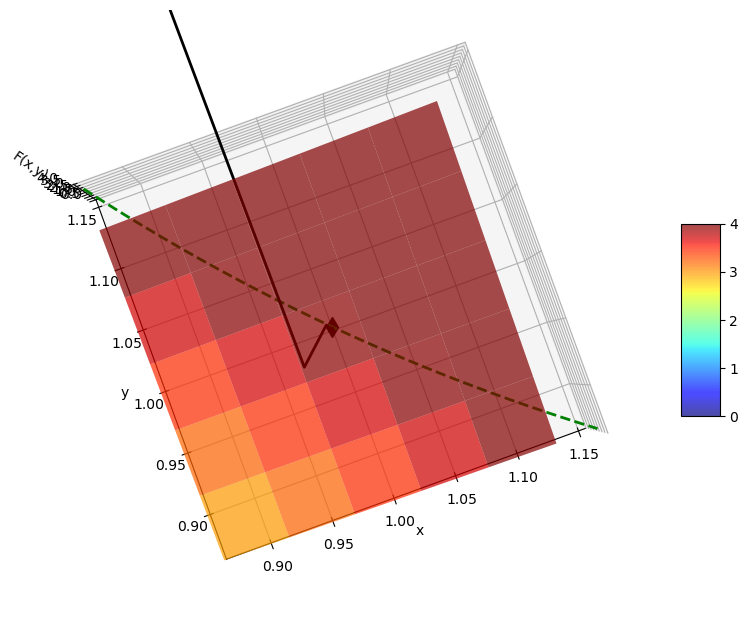

In [104]:
NN = 1.15
# Show solution paths in a surface plot
x = np.arange(1/NN, NN, 0.05)
y = np.arange(1/NN, NN, 0.05)
X, Y = np.meshgrid(x, y)
Z = F([X, Y])

# set up the figure
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.azim = -110
ax.dist = 10
ax.elev = 89
ax.set_xlim(1/NN, NN)
ax.set_ylim(1/NN, NN)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("F(x,y)")

# plot the figure
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, alpha = 0.7, vmin=0, vmax=4)
fig.colorbar(surf, shrink=0.25, aspect=5)
plt.autoscale(False)

x1 = np.arange(1/NN,NN,.01)
ax.plot(sol.x[0],sol.x[1],F(sol.x),'kd',ms=10)
ax.plot(x1,1/x1,F([x1,1/x1]),'g--')
ax.plot(all_x_i,all_y_i,all_f_i,'k-')
ax.set_zlim([0, 4])
plt.savefig("figs/L3_SQP_2.png")
plt.show()